In [2]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 0
Problem 1
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 0\nProblem 1\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#create pandas dataframe and print first 5 rows
df = pd.read_csv("D3.csv")
df.head(5)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [3]:
#split columns into 3 explanitory variables as well as output y
x1 = df.values[:,0]
x2 = df.values[:,1]
x3 = df.values[:,2]
y = df.values[:,3]

Text(0, 0.5, 'y')

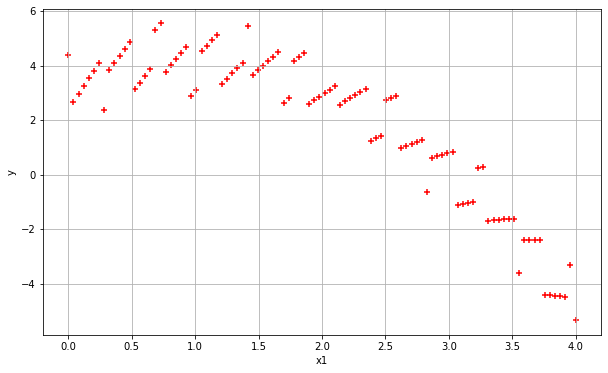

In [7]:
#plot x1 vs y
plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(x1, y, color='red', marker='+')
plt.grid()
plt.xlabel('x1')
plt.ylabel('y')

Text(0, 0.5, 'y')

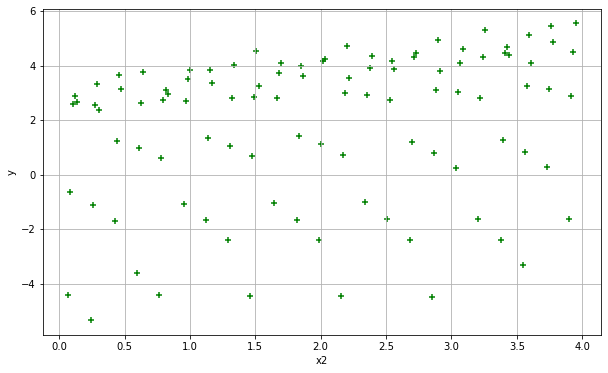

In [9]:
#plot x2 vs y
plt.scatter(x2, y, color='green', marker='+')
plt.grid()
plt.xlabel('x2')
plt.ylabel('y')

Text(0, 0.5, 'y')

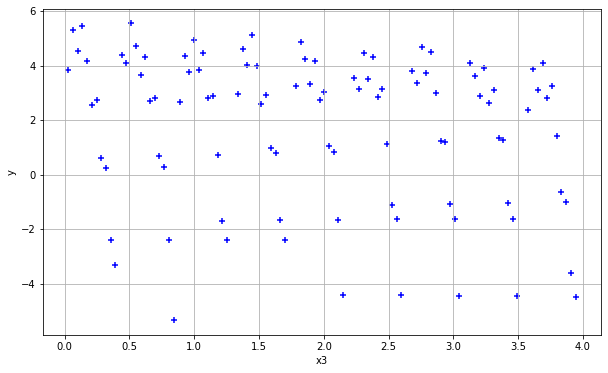

In [10]:
#plot x3 vs y
plt.scatter(x3, y, color='blue', marker='+')
plt.grid()
plt.xlabel('x3')
plt.ylabel('y')

In [78]:
#create x_0 2d array of ones with length m
m = len(x1)
x_0 = np.ones((m,1))
x_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [79]:
#prepare x variables so they can be concatenated with x_0
x1 = x1.reshape(m,1)
x2 = x2.reshape(m,1)
x3 = x3.reshape(m,1)

In [80]:
#horizontally stack x_0 onto each x variable
X1 = np.hstack((x_0, x1))
X2 = np.hstack((x_0, x2))
X3 = np.hstack((x_0, x3))

In [81]:
#loss function
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = (1/(2*m))*np.sum(sqrErrors)
    
    return J

In [82]:
#gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha/m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

In [83]:
#initialize thetas, # of iterations, and learning rate for each model
theta1 = np.zeros(2)
theta2 = np.zeros(2)
theta3 = np.zeros(2)
iterations1 = 5000
iterations2 = 2000
iterations3 = 9500
alpha1 = .06
alpha2 = .08
alpha3 = .011

In [84]:
#calculate costs for each regression and output last value which should be the lowest
theta1, cost_history1 = gradient_descent(X1, y, theta1, alpha1, iterations1)
print("Final value of theta1 =", theta1)
#print("Cost history1 =", cost_history1)
theta2, cost_history2 = gradient_descent(X2, y, theta2, alpha2, iterations2)
print("Final value of theta2 =", theta2)
#print("Cost history2 =", cost_history2)
theta3, cost_history3 = gradient_descent(X3, y, theta3, alpha3, iterations3)
print("Final value of theta3 =", theta3)
#print("Cost history3 =", cost_history3)

Final value of theta1 = [ 5.92794892 -2.03833663]
Final value of theta2 = [0.73606043 0.55760761]
Final value of theta3 = [ 2.8714221  -0.52048288]


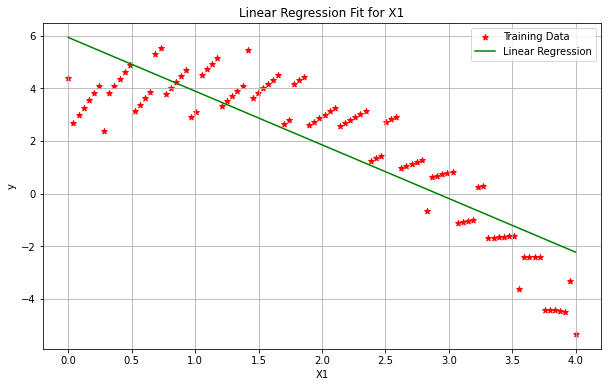

In [85]:
#plot X1 regression
plt.scatter(X1[:,1], y, color='red', marker='*', label='Training Data')
plt.plot(X1[:,1],X1.dot(theta1), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Linear Regression Fit for X1')
plt.legend()

Cost1: 0.9849930825405945


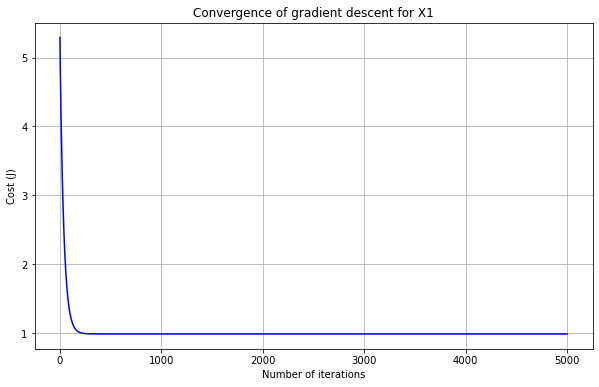

In [86]:
#plot X1 loss vs iterations
plt.plot(range(1, iterations1 + 1), cost_history1, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X1')
print("Cost1:", cost_history1[-1])

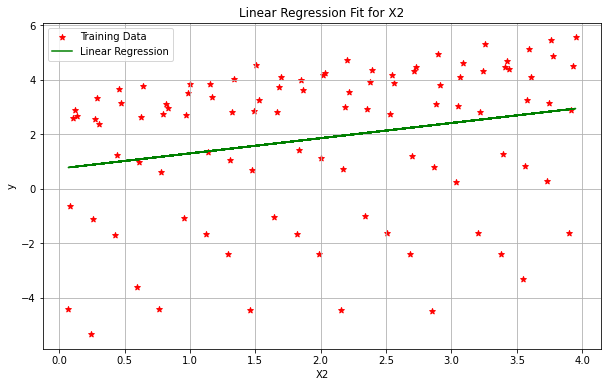

In [87]:
#plot X2 regression
plt.scatter(X2[:,1], y, color='red', marker='*', label='Training Data')
plt.plot(X2[:,1],X2.dot(theta2), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X2')
plt.ylabel('y')
plt.title('Linear Regression Fit for X2')
plt.legend()

Cost2: 3.599366018168041


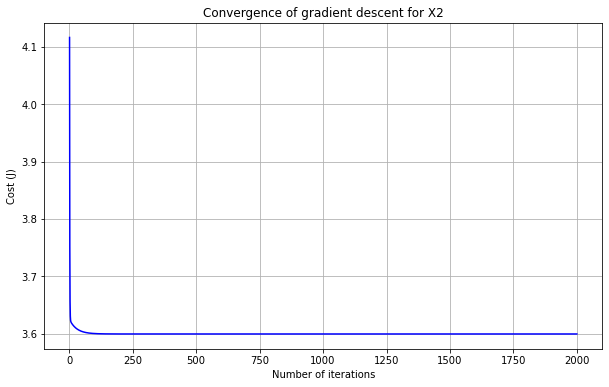

In [88]:
#plot X2 loss vs iterations
plt.plot(range(1, iterations2 + 1), cost_history2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X2')
print("Cost2:", cost_history2[-1])

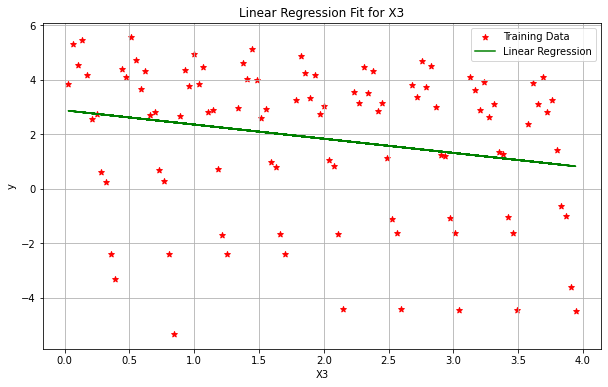

In [89]:
#plot X3 regression
plt.scatter(X3[:,1], y, color='red', marker='*', label='Training Data')
plt.plot(X3[:,1],X3.dot(theta3), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X3')
plt.ylabel('y')
plt.title('Linear Regression Fit for X3')
plt.legend()

Cost3: 3.629451124607915


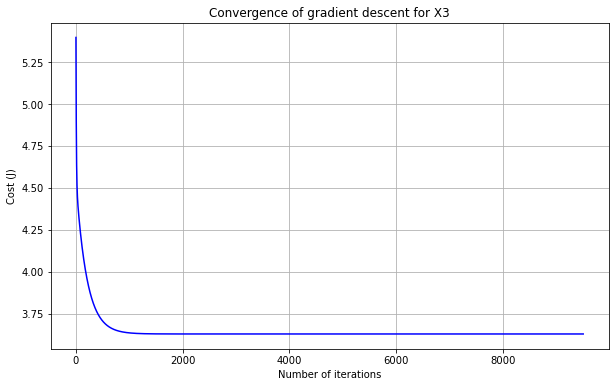

In [90]:
#plot X3 loss vs iterations
plt.plot(range(1, iterations3 + 1), cost_history3, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X3')
print("Cost3:", cost_history3[-1])